In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
np. random.seed(0)

# データの生成
- 全て1つのクエリに対する関連度のデータとする

In [3]:
true_w = np.array([1.3, 2.1, -1.8])

In [4]:
X = np.random.rand(30, 3)

In [5]:
# yはモデルから生成された関連度とする
y = true_w.dot(X.T) + np.random.rand(30) * 0.1

In [6]:
df = pd.DataFrame(X, columns=['a', 'b', 'c'])
df['y'] = y

In [7]:
df.head(10)

,a,b,c,y
0,0.548814,0.715189,0.602763,1.162238
1,0.544883,0.423655,0.645894,0.502155
2,0.437587,0.891773,0.963663,0.720173
3,0.383442,0.791725,0.528895,1.280718
4,0.568045,0.925597,0.071036,2.583287
5,0.087129,0.020218,0.832620,-1.324670
6,0.778157,0.870012,0.978618,1.135768
7,0.799159,0.461479,0.780529,0.605071
8,0.118274,0.639921,0.143353,1.322449
9,0.944669,0.521848,0.414662,1.578029


# ペアワイズで学習してみる

In [8]:
pairs = []
for i in range(30):
    for j in range(i+1, 30):
        if y[i] > y[j]:
            pairs.append([X[i], X[j]])
        else:
            pairs.append([X[j], X[i]])
# 順番をシャッフルする
np.random.shuffle(pairs)

# 学習

In [9]:
# 学習のパラメータ
lr = 0.01
epoch = 20

# 重みは適当に初期化
w = np.random.rand(3)
print(w)

[0.68357296 0.38072924 0.63393096]


## 現状での精度
- swapped pairの数を調べる

In [10]:
n_swap = 0
for x_i, x_j in pairs:
    y_i = w.dot(x_i.T)
    y_j = w.dot(x_j.T)
    if y_i < y_j:
        n_swap += 1

In [11]:
n_swap, len(pairs), n_swap/len(pairs)

(180, 435, 0.41379310344827586)

## 重みの更新

In [12]:
weight_history = []
for i in range(epoch):
    for x_i, x_j in pairs:
        grad = np.exp(w*x_j - w*x_i) * (x_j - x_i)
        w -=  lr * grad
        weight_history.append(w.tolist())
    np.random.shuffle(pairs)

In [13]:
w

array([ 0.62576497,  2.7022818 , -1.20603895])

In [14]:
n_swap = 0
for x_i, x_j in pairs:
    y_i = w.dot(x_i.T)
    y_j = w.dot(x_j.T)
    if y_i < y_j:
        n_swap += 1

In [15]:
n_swap, len(pairs), n_swap/len(pairs)

(40, 435, 0.09195402298850575)

In [16]:
weight_history = np.array(weight_history)

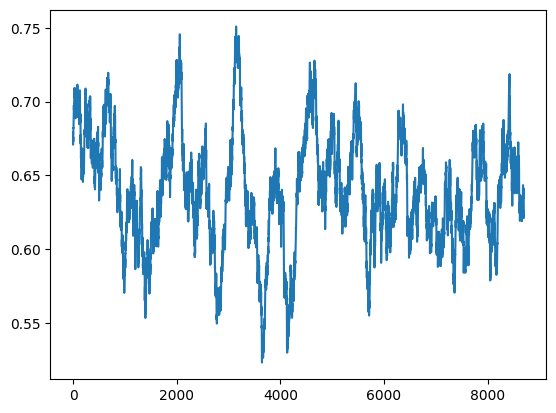

In [17]:
plt.plot(weight_history[:, 0])

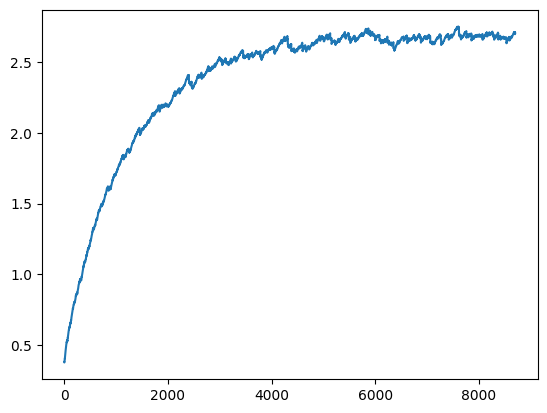

In [18]:
plt.plot(weight_history[:, 1])

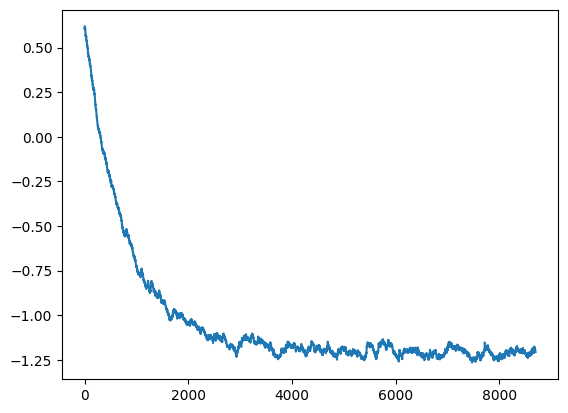

In [19]:
plt.plot(weight_history[:, 2])

## 最急降下法で実装する

In [20]:
# 学習のパラメータ
lr = 0.01
epoch = 30

# 重みは適当に初期化
w = np.random.rand(3)
print(w)

[0.81098136 0.16946799 0.11251762]


In [21]:
weight_history = []
for i in range(epoch):
    grad = np.array([0.0, 0.0, 0.0])
    for x_i, x_j in pairs:
        grad += np.exp(w*x_j - w*x_i) * (x_j - x_i)
    w -=  lr * grad
    weight_history.append(w.tolist())    

In [22]:
w

array([ 0.63538636,  2.69983286, -1.20986901])

In [23]:
n_swap = 0
for x_i, x_j in pairs:
    y_i = w.dot(x_i.T)
    y_j = w.dot(x_j.T)
    if y_i < y_j:
        n_swap += 1

In [24]:
n_swap, len(pairs), n_swap/len(pairs)

(39, 435, 0.0896551724137931)

In [25]:
weight_history = np.array(weight_history)

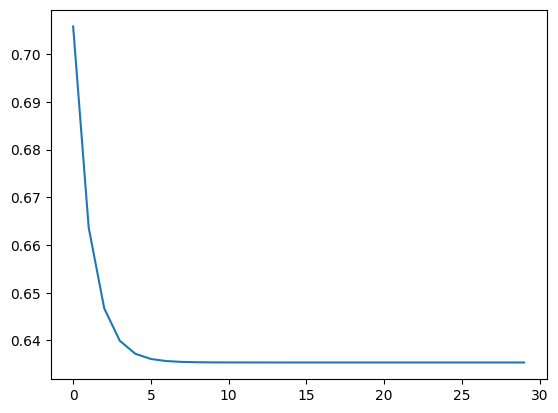

In [26]:
plt.plot(weight_history[:, 0])

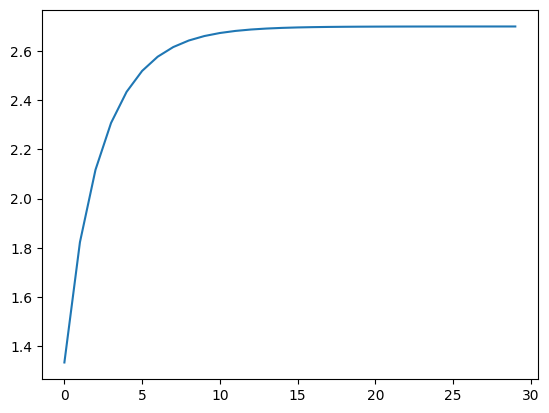

In [27]:
plt.plot(weight_history[:, 1])

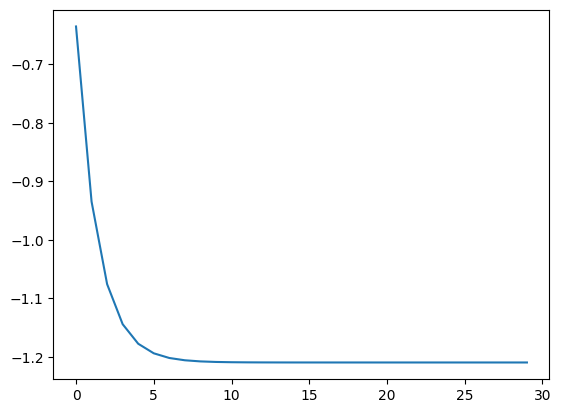

In [28]:
plt.plot(weight_history[:, 2])